<a href="https://colab.research.google.com/github/ChenshuLiu/Computer-Vision/blob/main/Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision

## Basic Image Manipulation

- Directory Manipulation
  - Make full use of the `os` library to access batch of files:
    - `os.listdir(dir)`: a function that lists all the sub-components within the specified directory
    - `os.path.join(dir#1, dir#2, ...)`: a function that joins the directories in the argument and make a single directory

- Image Loading
  - Make use of `cv2` (OpenCV) library to manipulate image files:
    - `cv2.imread(directory of image)`: the function reads in image file as numpy array
    - `cv2.imshow(directory of image)`: the function displays the image specified (however, this is disabled by colab since it requires a pop-up window)

- Image Display
  - Make use of `matplotlib.pyplot` module (usually abbreviated as `plt`) to visualize:
    - `plt.imshow(image)`: the function displays an image
    - `plt.show()`: the function display all active matplotlib figures


Useful Links:
- https://youtu.be/jztwpsIzEGc

In [12]:
import os
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

img_dir = '/content/drive/MyDrive/BE224B Final Project/NeedleImages_Labeled'
img_collection = []
for img_class in os.listdir(img_dir):
  # classes (i.e. needle vs. no needle)
  img_class_path = os.path.join(img_dir, img_class)
  for image in os.listdir(img_class_path):
    # individual image within each class folder
    img_path = os.path.join(img_class_path, image)
    img = cv2.imread(img_path) # img object is a nparray type object
    img_collection.append(img)

Note: one common practice for organizing or storing data/images is by assigning the same class of images into the same class folder under the big data folder. The folder structure can be displayed as follow:
- data_folder
  - class#1_folder
    - class#1_img#1
    - class#1_img#2
    - ...
  - class#2_folder
  - ...


### Image Data Type

In [16]:
print(f"The data type of image read in by cv2 is {type(img_collection[1])}")
print(f"The image shape can be checked: {img_collection[1].shape}")

The data type of image read in by cv2 is <class 'numpy.ndarray'>
The image shape can be checked: (512, 512, 3)


### Display Images

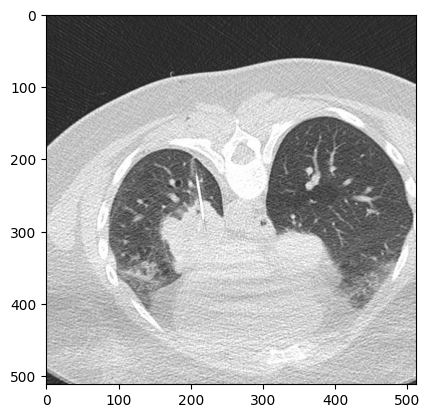

In [9]:
plt.imshow(img_collection[0])

To get rid of the line above the image, use `plt.show()`

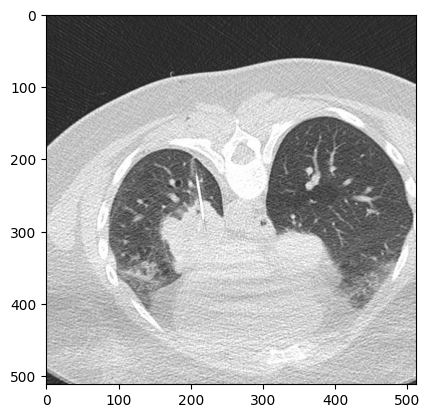

In [10]:
plt.imshow(img_collection[0])
plt.show()

### Train Test Split

In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths to the original dataset, train and test folders
dataset_dir = '/content/drive/MyDrive/BE224B Final Project/NeedleImages_Labeled'
train_dir = '/content/drive/MyDrive/BE224B Final Project/Split_NeedleImages_Labeled/Train'
test_dir = '/content/drive/MyDrive/BE224B Final Project/Split_NeedleImages_Labeled/Test'

# Define the test size for the train-test split
test_size = 0.2

# Load image file paths and labels
image_paths = []
labels = []

for class_folder in os.listdir(dataset_dir):
    class_folder_path = os.path.join(dataset_dir, class_folder)
    if os.path.isdir(class_folder_path):
        for image_file in os.listdir(class_folder_path):
            image_paths.append(os.path.join(class_folder_path, image_file))
            labels.append(class_folder)

# Split the data into train and test sets
train_paths, test_paths, train_labels, test_labels = train_test_split(
    image_paths, labels, test_size=test_size, random_state=123)

# Iterate over train set and copy/move images to class-specific folders
for image_path, label in zip(train_paths, train_labels):
    class_folder_train = os.path.join(train_dir, label)
    os.makedirs(class_folder_train, exist_ok=True)
    shutil.copy(image_path, class_folder_train)

# Iterate over test set and copy/move images to class-specific folders
for image_path, label in zip(test_paths, test_labels):
    class_folder_test = os.path.join(test_dir, label)
    os.makedirs(class_folder_test, exist_ok=True)
    shutil.copy(image_path, class_folder_test)

In [3]:
split_dir = '/content/drive/MyDrive/BE224B Final Project/Split_NeedleImages_Labeled'

for folder in os.listdir(split_dir):
  folder_dir = os.path.join(split_dir, folder)
  for subfolder in os.listdir(folder_dir):
    subfolder_dir = os.path.join(folder_dir, subfolder)
    num_files = len(os.listdir(subfolder_dir))
    print(f"The {subfolder} class in {folder} folder has {num_files} number of images.")

The NoNeedle class in Test folder has 37 number of images.
The Needle class in Test folder has 90 number of images.
The NoNeedle class in Train folder has 154 number of images.
The Needle class in Train folder has 351 number of images.


## Image Classification

### Image Classification in Pytorch

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision.transform import ToTensor

data_dir = '/content/drive/MyDrive/BE224B Final Project/NeedleImages_Labeled'

### Image Classification in Tensorflow